In [1]:
import scipy.io

In [2]:
data = scipy.io.loadmat(r'..\data\baseline\Osc_noise_Mod_N_10_Task_xor_N_200_Taus_4.0_25.0_Act_sigmoid_2022_04_14_000815_trials.mat')

In [45]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test_out', 'test_perf', 'test_x'])

In [46]:
test_x = data['test_x']
test_out = data['test_out']

In [47]:
type(test_x)

numpy.ndarray

In [48]:
test_x.shape, test_out.shape

((4, 50, 200, 300), (4, 50, 300))

### Note: (4, 50, 200, 300) 
-> (XOR stim combination) x (number of trials) x (number of neurons) x (timesteps)
-> (Number of Classes, Number of Samples, Number of Neurons, Number of Features)

In [49]:
test_x[0][0].shape

(200, 300)

In [50]:
test_out[0][0].shape

(300,)

# Running one

In [51]:
import os, sys; sys.path.append(os.path.abspath('../'))
# Importing the required packages
from inspector.rsa import ESM

In [53]:
netrep_metric = ESM(verbose = True)

In [54]:
ingestion_report = netrep_metric.ingest([test_x], [test_out], preprcessed = True)

In [55]:
digestion_report = netrep_metric.digest()

Data already digested, skipping digestion


In [56]:
energy_distance = netrep_metric.score()

0it [00:00, ?it/s]


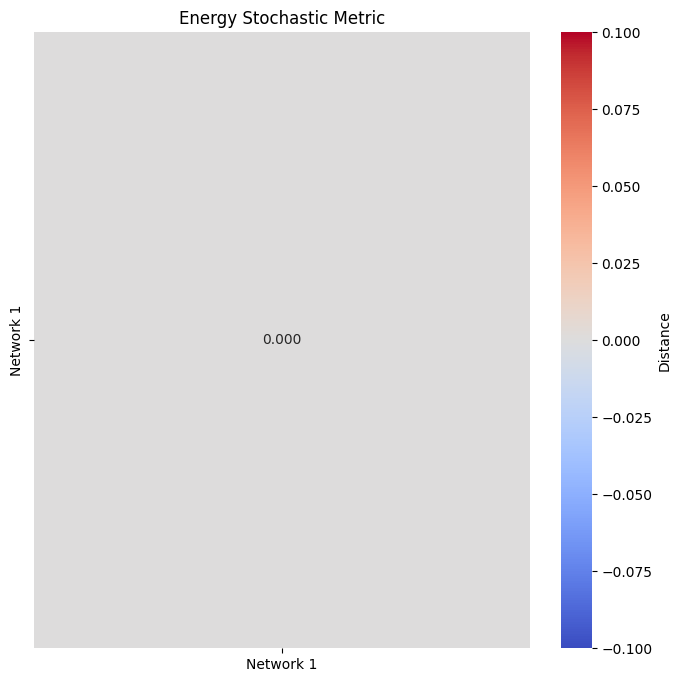

In [58]:
netrep_metric.plot()

# Now running for all 10

In [39]:
# Crawl the data directory
import os

data_dir = r'..\data\baseline'

data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]

In [40]:
# loop over the files

import scipy.io

All_network_X = []
All_network_y = []

for f in data_files[:5]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    All_network_X.append(test_x)
    All_network_y.append(test_out)

In [41]:
len(All_network_X), len(All_network_y)

(5, 5)

In [42]:
All_network_X[0].shape, All_network_y[0].shape

((4, 50, 200, 300), (4, 50, 300))

In [43]:
All_network_X[1].shape, All_network_y[1].shape

((4, 50, 200, 300), (4, 50, 300))

In [44]:
netrep_metric = ESM(verbose = True)
ingestion_report = netrep_metric.ingest(All_network_X, All_network_y, preprcessed = True)
digestion_report = netrep_metric.digest()
energy_distance = netrep_metric.score()

Data already digested, skipping digestion



  0%|          | 0/1 [57:23<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (10000,1) (10000,200,300) 

In [38]:
All_network_y[0][0][0]

array([ 0.29351109,  0.16660549,  0.1264033 ,  0.13812938,  0.12907755,
        0.09322704,  0.1193224 ,  0.11448389,  0.09993502,  0.0890185 ,
        0.11739675,  0.09613161,  0.09178556,  0.09953462,  0.09519377,
        0.07128354,  0.08545494,  0.08441631,  0.0730729 ,  0.08311478,
        0.07494228,  0.08762889,  0.09568451,  0.09814715,  0.11636374,
        0.12601438,  0.13802302,  0.12842554,  0.12309802,  0.13811499,
        0.14540395,  0.14718065,  0.14952016,  0.15190557,  0.18065891,
        0.19221005,  0.18171005,  0.15396449,  0.17623845,  0.1735255 ,
        0.15672551,  0.15180586,  0.18459903,  0.12942521,  0.12863481,
        0.11069907,  0.0623173 ,  0.07769541,  0.06256924,  0.04891922,
        0.01388177,  0.06535642,  0.14972973,  0.09545153,  0.14034157,
        0.13035461,  0.09775507,  0.13222674,  0.16276714,  0.13163246,
        0.13075143,  0.09245486,  0.15118633,  0.14540467,  0.13220906,
        0.11400497,  0.14735273,  0.09460881,  0.11164144,  0.11

In [36]:
All_network_y[0][1][0]

array([ 0.29351109,  0.16660549,  0.1264033 ,  0.13812938,  0.12907755,
        0.09322704,  0.1193224 ,  0.11448389,  0.09993502,  0.0890185 ,
        0.11739675,  0.09613161,  0.09178556,  0.09953462,  0.09519377,
        0.07128354,  0.08545494,  0.08441631,  0.0730729 ,  0.08311478,
        0.07494228,  0.08762889,  0.09568451,  0.09814715,  0.11636374,
        0.12601438,  0.13802302,  0.12842554,  0.12309802,  0.13811499,
        0.14540395,  0.14718065,  0.14952016,  0.15190557,  0.18065891,
        0.19221005,  0.18171005,  0.15396449,  0.17623845,  0.1735255 ,
        0.15672551,  0.15180586,  0.18459903,  0.12942521,  0.12863481,
        0.11069907,  0.0623173 ,  0.07769541,  0.06256924,  0.04891922,
        0.01388177,  0.06535642,  0.14972973,  0.09545153,  0.14034157,
        0.13035461,  0.09775507,  0.13222674,  0.16276714,  0.13163246,
        0.13075143,  0.09245486,  0.15118633,  0.14540467,  0.13220906,
        0.11400497,  0.14735273,  0.09460881,  0.11164144,  0.11

In [37]:
All_network_y[0][0][0]

IndexError: list index out of range

# Trying RAW

In [64]:
from netrep.metrics.stochastic import EnergyStochasticMetric

In [65]:
metric = EnergyStochasticMetric()

In [66]:
metric.fit(All_network_X[0], All_network_X[1])

distmat_energy = metric.score(All_network_X[0], All_network_X[1])

ValueError: operands could not be broadcast together with shapes (10000,1) (10000,200,300) 

# Inspecing the data

In [3]:
# Crawl the data directory
import os

data_dir = r'..\data\baseline'

data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
# loop over the files

import scipy.io

All_network_X = []
All_network_y = []

for f in data_files[:5]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    All_network_X.append(test_x)
    All_network_y.append(test_out)

print(len(All_network_X), len(All_network_y))
print(All_network_X[0].shape, All_network_y[0].shape)
print(All_network_X[1].shape, All_network_y[1].shape)

5 5
(4, 50, 200, 300) (4, 50, 300)
(4, 50, 200, 300) (4, 50, 300)


In [4]:
x = All_network_X[0]

In [5]:
x.shape

(4, 50, 200, 300)

In [25]:
cls = x[3]
cls[0]

array([[-3.9779768 , -5.8584528 , -6.73951817, ..., -8.3718605 ,
        -8.33625698, -8.21130276],
       [-3.61994171, -5.920784  , -6.83199406, ..., -6.06373549,
        -6.11511803, -6.58381367],
       [-3.44447446, -5.07701778, -7.03923702, ..., -6.0229888 ,
        -5.38882589, -5.43178129],
       ...,
       [-2.51932287, -4.04019451, -4.69479465, ..., -6.01965046,
        -6.05647993, -6.04965019],
       [-4.07090759, -6.45766068, -7.07213783, ..., -4.73202467,
        -4.64021063, -5.17831182],
       [-1.0517993 , -1.85823357, -2.0785439 , ..., -4.32114458,
        -4.46249294, -4.2462821 ]])

In [26]:
sample = cls[0]

In [27]:
sample.shape

(200, 300)

In [28]:
first_neuron = sample[0]
first_neuron

array([ -3.9779768 ,  -5.8584528 ,  -6.73951817,  -7.78661871,
        -7.90779734,  -7.84516287,  -7.75830078,  -7.29568815,
        -7.52142525,  -7.03220129,  -6.99367189,  -7.10705614,
        -6.89572811,  -6.96535826,  -6.33904076,  -5.97483349,
        -5.63811111,  -6.23266745,  -5.68556118,  -5.93067694,
        -6.45221567,  -6.25997114,  -6.91380358,  -6.28532362,
        -6.80714989,  -7.36880064,  -7.27778101,  -7.67836952,
        -7.48363638,  -7.71687317,  -7.56525469,  -7.6497016 ,
        -7.35744143,  -7.90207148,  -8.37526417,  -8.12209034,
        -8.12089634,  -7.70861387,  -7.43335819,  -6.62532043,
        -6.0627017 ,  -6.23400593,  -6.23981094,  -6.62497997,
        -5.9927578 ,  -6.18249846,  -5.48925257,  -6.19796801,
        -5.9144845 ,  -6.18754005,  -5.7756176 ,  -5.87478352,
        -6.2290287 ,  -6.09305334,  -5.78553772,  -5.97016907,
        -6.38686085,  -6.64046335,  -6.69664764,  -5.95206165,
        -5.57462835,  -5.67435026,  -5.64293528,  -5.78

In [20]:
first_neuron = sample[0]
first_neuron

array([-3.23564363, -5.6768465 , -6.31444025, -7.05238199, -7.88655567,
       -7.80852795, -7.88889456, -7.63654995, -7.41744423, -8.34021091,
       -8.68915653, -9.17035103, -9.06533527, -8.91482449, -7.93131638,
       -8.56497955, -8.66284275, -8.5894537 , -8.49774551, -8.52072239,
       -8.57236004, -8.85190964, -8.63527393, -8.96435833, -8.89694977,
       -8.93808174, -8.6672163 , -8.74254513, -8.4451704 , -8.77454758,
       -9.08555126, -9.59246826, -8.57597637, -8.31344032, -8.83381939,
       -8.58596039, -8.84894943, -8.52038956, -8.51614094, -8.53339386,
       -8.51991272, -8.77113533, -8.39535999, -8.24328613, -7.8628993 ,
       -7.67218161, -7.84231281, -7.29031563, -7.62705183, -8.31622219,
       -8.25695705, -8.08195686, -7.50775719, -7.84283924, -8.09155083,
       -7.91572857, -8.07832336, -8.09521675, -7.946383  , -7.61905098,
       -7.74008656, -7.98001766, -7.76517439, -7.8869381 , -8.02518749,
       -7.7389164 , -7.00569963, -7.32486629, -7.00878143, -6.47

In [29]:
import seaborn as sns

(200, 300)


<Axes: >

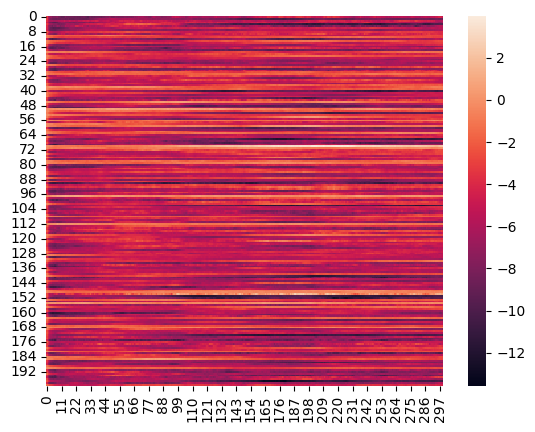

In [34]:
cls = x[0]
sample = cls[0]
print(sample.shape)
# plot sns heatmap
sns.heatmap(sample)

(200, 300)
(200, 300)


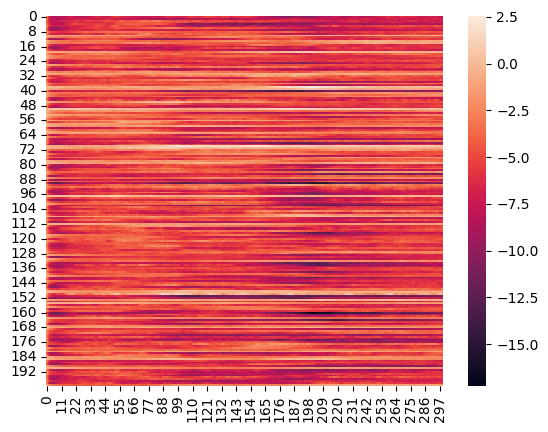

In [38]:
cls = x[1]; sample = cls[1]; print(sample.shape); sns.heatmap(sample)

(200, 300)


<Axes: >

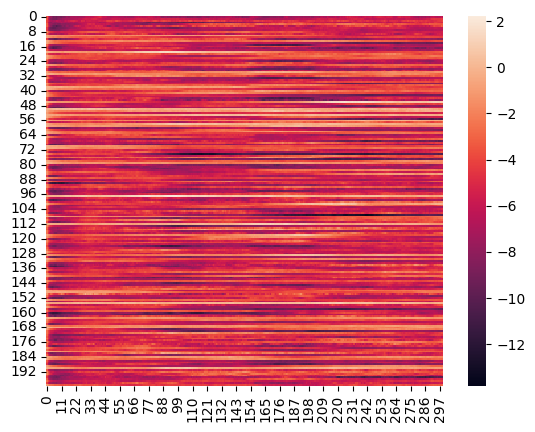

In [39]:
cls = x[2]; sample = cls[2]; print(sample.shape); sns.heatmap(sample)

(200, 300)


<Axes: >

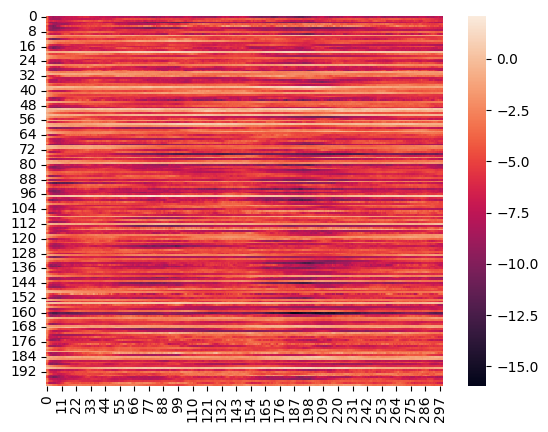

In [41]:
cls = x[3]; sample = cls[3]; print(sample.shape); sns.heatmap(sample)